## EDA And Feature Engineering Flight Price Prediction
check the dataset info below
https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

In [1]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from vpython import sphere, box  # Import the required functions from vpython

%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
pip install vpython

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
df=pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


C:\Users\dtung\AppData\Local\Temp\ipykernel_11884\2632690381.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"])


In [8]:
## get the basics info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [9]:
df.describe()

,Date_of_Journey,Price
count,10683,10683.000000
mean,2019-05-04 19:56:41.853412096,9087.064121
min,2019-03-01 00:00:00,1759.000000
25%,2019-03-27 00:00:00,5277.000000
50%,2019-05-15 00:00:00,8372.000000
75%,2019-06-06 00:00:00,12373.000000
max,2019-06-27 00:00:00,79512.000000
std,NaN,4611.359167


In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [19]:
## Drop Date Of Journey

df.drop('Date_of_Journey',axis=1,inplace=True)

In [20]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [119]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [120]:
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(':').str[1]

In [121]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [122]:
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_min']=df['Arrival_min'].astype(int)

In [123]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [124]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [21]:
df['Departure_hour']=df['Dep_Time'].str.split(':').str[0]
df['Departure_min']=df['Dep_Time'].str.split(':').str[1]

In [22]:
df['Departure_hour']=df['Departure_hour'].astype(int)
df['Departure_min']=df['Departure_min'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  object
 11  Month            10683 non-null  object
 12  Year             10683 non-null  object
 13  Departure_hour   10683 non-null  int64 
 14  Departure_min    10683 non-null  int64 
dtypes: int64(3), object(12)
memory usage: 1.2+ MB


Calculate the difference between the maximum and minimum unit_price

In [52]:
df['Price'].max()

np.int64(79512)

In [51]:
df['Price'].max() - df['Price'].min()

np.int64(77753)

In [32]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [24]:
df.drop('Dep_Time',axis=1,inplace=True)

In [59]:
df['Month'].unique()

array(['03', '05', '06', '04'], dtype=object)

In [ ]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,05,2019,5,50


In [26]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [131]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [132]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [133]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [134]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [135]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min


In [137]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50


In [138]:
df.drop('Route',axis=1,inplace=True)

In [ ]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,05,2019,5,50


In [ ]:
df['Duration'].str.split(' ').str[0].str.split('h').str[0]

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10683, dtype: object

In [43]:
df['Duration'].str.split(' ').str[1].str.split('m').str[0]

0         50
1         25
2        NaN
3         25
4         45
        ... 
10678     30
10679     35
10680    NaN
10681     40
10682     20
Name: Duration, Length: 10683, dtype: object

In [144]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [145]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [44]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 2.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/11.1 MB 2.4 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/11.1 MB 2.5 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.1 MB 2.6 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/11.1 MB 2.7 MB/s eta 0:00:03
   ------------- -------------------------- 3.7/11.1 MB 2.8 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/11.1 MB 2.6 MB/s eta 0:00:03
   --------------- ------------------------ 4.2/11.1 MB 2.4 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.1 MB 2.3 MB/s eta 0:00:03
   ------------------ --------------------- 5.2/11.1 MB 2.3 MB/s eta 0:00:03
   --------------------- ------------------ 6.0/11.1 MB 2.4 MB/s eta 0:00:03
   ----------

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
encoder=OneHotEncoder()

In [ ]:
encoder.fit_transform(df[['Airline','Source','Destination']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


How many arilines were flying between april 2019 and May 2019?

In [112]:
airline_mask = df["Airline"].isin(["Air India","Jet Airways"])
date_mask = df["Date_of_Journey"].between("2019-04-01", "2019-05-31")
df.loc[airline_mask & date_mask]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
13,Jet Airways,2019-05-09,Kolkata,Banglore,CCU → BOM → BLR,21:10,09:20 10 May,12h 10m,1 stop,In-flight meal not included,9663
19,Jet Airways,2019-05-27,Delhi,Cochin,DEL → BOM → COK,16:00,12:35 28 May,20h 35m,1 stop,In-flight meal not included,12898
24,Jet Airways,2019-05-06,Kolkata,Banglore,CCU → BOM → BLR,18:55,08:15 07 May,13h 20m,1 stop,In-flight meal not included,7757
31,Air India,2019-05-01,Kolkata,Banglore,CCU → GAU → DEL → BLR,09:50,23:15,13h 25m,2 stops,No info,13227
...,...,...,...,...,...,...,...,...,...,...,...
10670,Air India,2019-05-12,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,23:15,17h 25m,2 stops,No info,11411
10673,Jet Airways,2019-05-27,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,15h,2 stops,No info,16704
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229


Jet airways is the most company that people use to travel. below we will try to investigate more about the reason behind that.

In [9]:
colors_hex = ['#ef476f', '#ffd166', '#06d6a0', '#118ab2', '#073b4c', '#504746']
sns.set_palette(sns.color_palette(colors_hex))

In [10]:
fig = px.pie(df['Airline'].value_counts(), values='count', names=df['Airline'].value_counts().index, color=df['Airline'].value_counts(), title='Type Of Airlines ', color_discrete_sequence=colors_hex)
fig.show()

Which city has more trips?
Most Trips are take off from Delhi.

Most Trips are landing in Cochin.

In [12]:
# Count the occurrences of each source and destination city
source_city_count = df['Source'].value_counts()
destination_city_count = df['Destination'].value_counts()

# Pie chart for Source City Percentage
fig1 = go.Figure(go.Pie(
    labels=source_city_count.index, 
    values=source_city_count.values, 
    textinfo='label+percent',
    hole=0.3,  # Optional: For a donut chart look
    marker=dict(colors=colors_hex)
))

fig1.update_layout(
    title="Source City Percentage"
)
fig1.show()

fig2 = go.Figure(go.Pie(
    labels=destination_city_count.index, 
    values=destination_city_count.values, 
    textinfo='label+percent',
    hole=0.3,
    marker=dict(colors=colors_hex) 
))

fig2.update_layout(
    title="Destination City Percentage"
)
fig2.show()

In [ ]:
# Count the occurrences of each source and destination city
arrival_time_count = df['Arrival_Time'].value_counts().nlargest(5)
departure_time_count = df['Dep_Time'].value_counts().nlargest(5)

# Pie chart for Source City Percentage
fig1 = go.Figure(go.Pie(
    labels=arrival_time_count.index, 
    values=arrival_time_count.values, 
    textinfo='label+percent',
    hole=0.3,
    marker=dict(colors=colors_hex)
))

fig1.update_layout(
    title="Arrival Time Percentage"
)
fig1.show()

fig2 = go.Figure(go.Pie(
    labels=departure_time_count.index, 
    values=departure_time_count.values, 
    textinfo='label+percent',
    hole=0.3,
    marker=dict(colors=colors_hex)
))
fig2.update_layout(
    title="Departure Time Percentage"
)
fig2.show()

In [53]:
# Find all flights with the longest distance
longest_flights = df[df["Duration"] == df["Duration"]]
longest_flights
fig = go.Figure(go.Bar(
    x=longest_flights["Airline"],
    y=longest_flights["Duration"],
    marker=dict(color='pink')
))

fig.update_layout(
    title="Longest Airline(s) by Duration",
    xaxis_title="Airline",
    yaxis_title="Duration (hours)",
    plot_bgcolor='black'
)

# Show the plot
#plt.gca().set_facecolor('black')  # Change background color of the axes

fig.show()

In [41]:
#Get the total quantity of items grouped by the airlines and save it in a data frame called price_by_airlines
price_by_airlines = df.groupby("Airline")["Price"].sum().reset_index()
price_by_airlines

,Airline,Price
0,Air Asia,1783293
1,Air India,16838841
2,GoAir,1137045
3,IndiGo,11648071
4,Jet Airways,44817461
5,Jet Airways Business,350152
6,Multiple carriers,13039603
7,Multiple carriers Premium economy,148445
8,SpiceJet,3548717
9,Trujet,4140


In [ ]:
#Q1 : Does Price vary with Airline?¶
fig = px.box(df, x='Airline', y='Price', title='Price Variation by Airline', color='Airline', color_discrete_sequence=colors_hex)
fig.show()

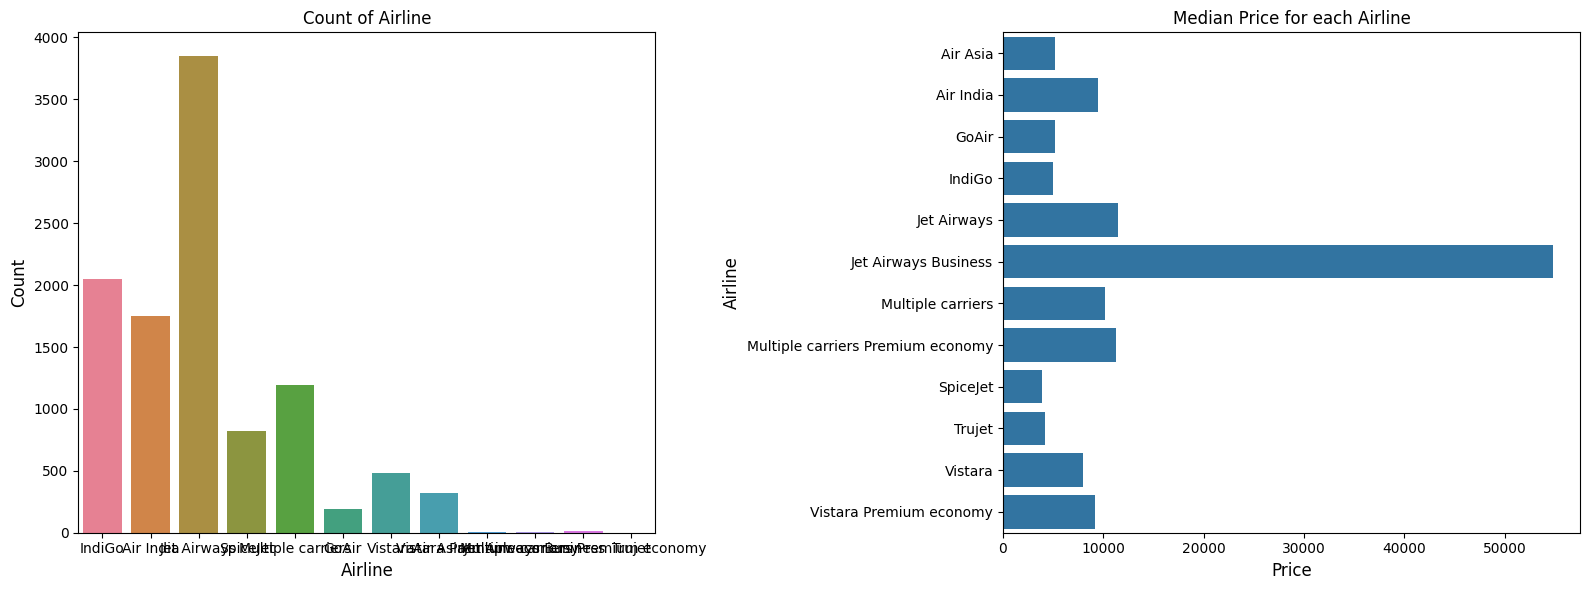

In [27]:
def visual(feature):
    # Calculate the median price for each feature group
    feature_median = df.groupby(feature)['Price'].median()

    # Create the figure and axes for plotting
    plt.figure(figsize=(16, 6))
    
    # First subplot: Count plot for the feature
    plt.subplot(1, 2, 1)
    sns.countplot(x=df[feature], data=df, hue=feature)
    plt.title(f'Count of {feature}', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Second subplot: Horizontal bar plot for median prices
    plt.subplot(1, 2, 2)
    sns.barplot(x=feature_median.values, y=feature_median.index, orient='h')  # Horizontal bar plot
    plt.title(f'Median Price for each {feature}', fontsize=12)
    plt.xlabel('Price', fontsize=12)
    plt.ylabel(feature, fontsize=12)

    # Display the plots
    plt.tight_layout()
    plt.show()

# Example of calling the visual function for 'Airline'
visual('Airline')

In [60]:
def visual(feature):  ####Repair this plot
  feature_median = df.groupby(feature)['Price'].median()
  plt.figure(figsize=(16, 6))
  plt.subplot(1,2,1)
  sns.histplot(x=df[feature], data=df, hue=feature)

  plt.subplot(1,2,2)
  #sns.barplot(x=feature_median.index, y=feature_median.values,hue = feature_median.index, orient='h')

  plt.title('price for every' + feature, fontsize=8)
  plt.ylabel('Price', fontsize=12)
  plt.xlabel(feature, fontsize=12)
  sns.barplot(y=feature_median.values, x=feature_median.index, orient='h')  # Horizontal bar plot
  plt.show()


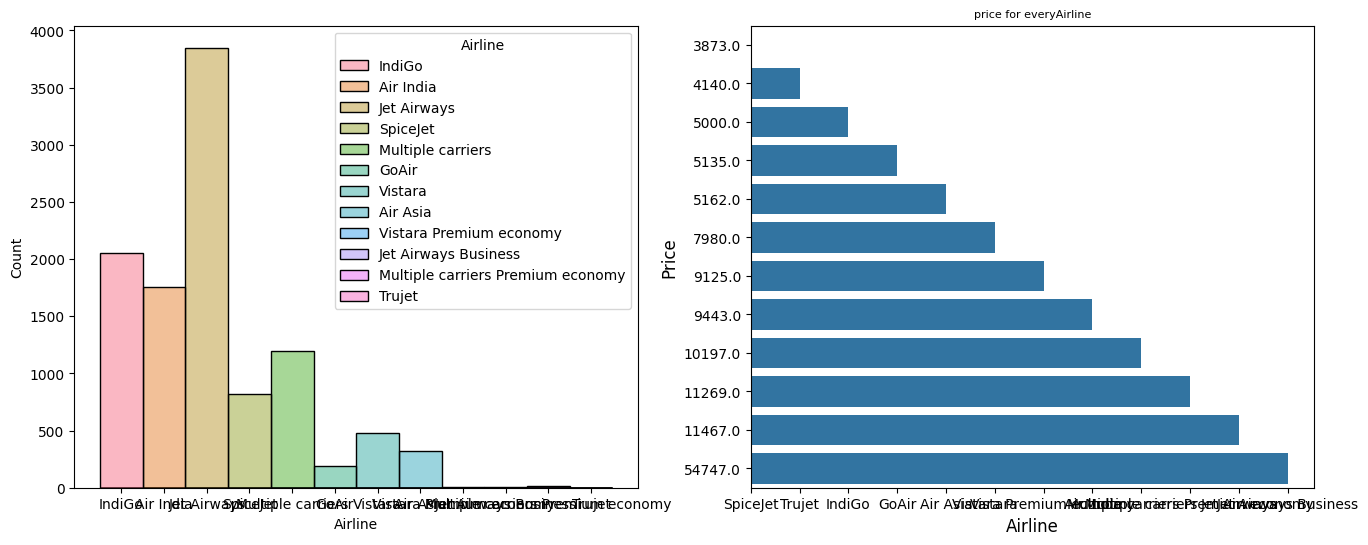

In [61]:
visual('Airline')

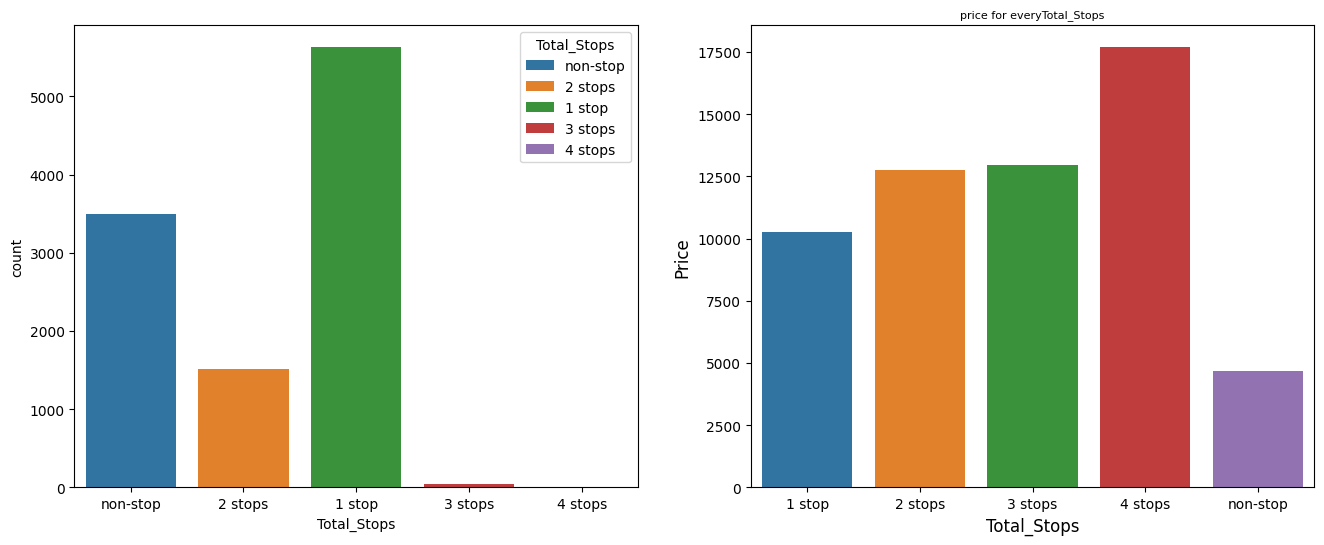

In [20]:
visual('Total_Stops')

In [13]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
